In [351]:
from sympy import *
from sympy.vector import *

Space=CoordSys3D('ViewSpace')
ColorSpace=CoordSys3D('Color')
i=Space.i; j=Space.j; k=Space.k
r=ColorSpace.i; g=ColorSpace.j; b=ColorSpace.k

def makeVector(name):
    return Symbol(name+"_x")*i + Symbol(name+"_y")*j + Symbol(name+"_z")*k
def makeColor(name):
    return Symbol(name+"_r")*r + Symbol(name+"_g")*g + Symbol(name+"_b")*b

Energy=Symbol('E')
Lpos=makeVector('L')
Lcol=makeColor('C')
View=makeVector('V')
Norm=makeVector('N')


Rough=Symbol('M_Rough')
Albedo=makeColor('M_Albedo')
Metal=Symbol('M_Metal')


In [352]:
def superrec(thing,func):
    out=[]
    for item in thing:
        isiter=False
        try:
            iter(item)
            isiter=True
        except:
            pass

        if(isiter):
            out = out + superrec(item,func)
        else:
            out.append(func(item))
    return out

def rec_count(thing):
    if(hasattr(thing,'count_ops')):
        return thing.count_ops()
    return 0

def compute_cost(ex):
    return sum(superrec(cse(ex),rec_count))

class CseNamer:
    name = "tmp"
    counter = 0

    def __iter__(self):
        return self
    
    def __next__(self):
        self.counter+=1
        return self.name+str(self.counter)

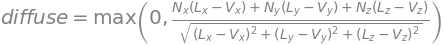

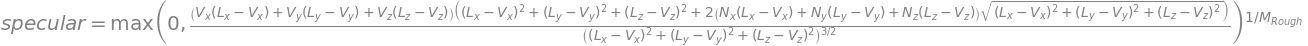

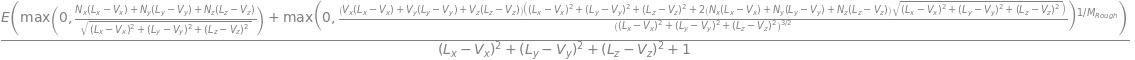

In [353]:
#point
Ldir=(View-Lpos).normalize()
diffuse=Max(dot(-Ldir,Norm),0)
diffuse=simplify(diffuse)
display(Eq(Symbol('diffuse'),diffuse))

Refl=Ldir-2*Ldir.projection(Norm)
specular=Max(dot(-View,Refl),0)**(1/Rough)
specular=simplify(specular)
display(Eq(Symbol('specular'),specular))

dist=(Lpos-View).magnitude()
atten=1/(dist**2+1)

pointlight=(diffuse+specular)*atten*Energy
display(pointlight)
compute_cost(pointlight)

In [367]:

V2L=(Lpos-View)

#vector from view to point along Norm closest to Lpos
NormLook=dot(V2L,V2L)*((Norm.projection(V2L)*dot(Norm,Norm))**-1)

ldist=(View+NormLook-Lpos).magnitude()

diffuse=(Norm.projection(V2L)*dot(Norm,Norm))
display(diffuse)


Refl=(View-2*View.project(Norm))

TypeError: -1 cannot be interpreted correctly